## 2.3 处理缺失数据

### 检查缺失数据

**基础知识**

In [1]:
def foo(): pass
f = foo()
print(f)

None


In [2]:
type(f)

NoneType

In [3]:
None + 2

TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

In [4]:
import numpy as np
np.nan + 2

nan

In [5]:
type(np.nan)

float

In [7]:
import pandas as pd
s = pd.Series([1, 2, None, np.nan])    # ①
s

0    1.0
1    2.0
2    NaN
3    NaN
dtype: float64

In [8]:
s.sum()

3.0

In [10]:
s.isna()

0    False
1    False
2     True
3     True
dtype: bool

In [9]:
df = pd.DataFrame({"one":[1, 2, np.nan], "two":[np.nan, 3, 4]})
df.isna()

,one,two
0,False,True
1,False,False
2,True,False


**项目案例**

In [11]:
path = "/Users/qiwsir/Documents/Codes/DataSet"
hitters = pd.read_csv(path + "/kaggle/Hitters.csv")
hitters.isna().any()

AtBat        False
Hits         False
HmRun        False
Runs         False
RBI          False
Walks        False
Years        False
CAtBat       False
CHits        False
CHmRun       False
CRuns        False
CRBI         False
CWalks       False
League       False
Division     False
PutOuts      False
Assists      False
Errors       False
Salary        True
NewLeague    False
dtype: bool

In [14]:
(hitters.shape[0] - hitters.count()) / hitters.shape[0]

AtBat        0.00000
Hits         0.00000
HmRun        0.00000
Runs         0.00000
RBI          0.00000
Walks        0.00000
Years        0.00000
CAtBat       0.00000
CHits        0.00000
CHmRun       0.00000
CRuns        0.00000
CRBI         0.00000
CWalks       0.00000
League       0.00000
Division     0.00000
PutOuts      0.00000
Assists      0.00000
Errors       0.00000
Salary       0.18323
NewLeague    0.00000
dtype: float64

In [15]:
hitters.shape

(322, 20)

In [16]:
hitters.count()

AtBat        322
Hits         322
HmRun        322
Runs         322
RBI          322
Walks        322
Years        322
CAtBat       322
CHits        322
CHmRun       322
CRuns        322
CRBI         322
CWalks       322
League       322
Division     322
PutOuts      322
Assists      322
Errors       322
Salary       263
NewLeague    322
dtype: int64

In [17]:
(df.shape[1] - df.T.count()) / df.shape[1] 

0    0.5
1    0.0
2    0.5
dtype: float64

In [20]:
df.dropna()

,one,two
1,2.0,3.0


In [21]:
df = pd.concat([df, pd.DataFrame({"one": [np.nan], "two": [np.nan], "three": [np.nan]})], 
               ignore_index=True, sort=False)    # 重新构建一个含有缺失值的DataFrame对象
df

,one,two,three
0,1.0,NaN,NaN
1,2.0,3.0,NaN
2,NaN,4.0,NaN
3,NaN,NaN,NaN


In [22]:
df.dropna(axis=0, how='all')    # how声明删除条件

,one,two,three
0,1.0,NaN,NaN
1,2.0,3.0,NaN
2,NaN,4.0,NaN


In [23]:
df.dropna(thresh=2)    # 非缺失值小于2的删除

,one,two,three
1,2.0,3.0,NaN


In [24]:
new_hitters = hitters.dropna()
new_hitters.isna().any()

AtBat        False
Hits         False
HmRun        False
Runs         False
RBI          False
Walks        False
Years        False
CAtBat       False
CHits        False
CHmRun       False
CRuns        False
CRBI         False
CWalks       False
League       False
Division     False
PutOuts      False
Assists      False
Errors       False
Salary       False
NewLeague    False
dtype: bool

**动手练习**

In [25]:
eles = pd.read_csv(path + "/elemanets/elements.csv")
eles.isna().any()

atomic number               False
symbol                      False
name                        False
atomic mass                 False
CPK                         False
electronic configuration    False
electronegativity            True
atomic radius                True
ion radius                   True
van der Waals radius         True
IE-1                         True
EA                           True
standard state               True
bonding type                 True
melting point                True
boiling point                True
density                      True
metal                       False
year discovered             False
group                       False
period                      False
dtype: bool

In [26]:
(eles.shape[0] - eles.count()) / eles.shape[0]

atomic number               0.000000
symbol                      0.000000
name                        0.000000
atomic mass                 0.000000
CPK                         0.000000
electronic configuration    0.000000
electronegativity           0.177966
atomic radius               0.398305
ion radius                  0.220339
van der Waals radius        0.677966
IE-1                        0.135593
EA                          0.279661
standard state              0.161017
bonding type                0.169492
melting point               0.144068
boiling point               0.203390
density                     0.186441
metal                       0.000000
year discovered             0.000000
group                       0.000000
period                      0.000000
dtype: float64

In [28]:
eles_nona = eles.dropna()
eles_nona.isna().any()

atomic number               False
symbol                      False
name                        False
atomic mass                 False
CPK                         False
electronic configuration    False
electronegativity           False
atomic radius               False
ion radius                  False
van der Waals radius        False
IE-1                        False
EA                          False
standard state              False
bonding type                False
melting point               False
boiling point               False
density                     False
metal                       False
year discovered             False
group                       False
period                      False
dtype: bool

### 2.3.2 用指定值填补缺失数据

**基础知识**

In [29]:
df = pd.DataFrame({"one":[10, 11, 12], 'two':[np.nan, 21, 22], "three":[30, np.nan, 33]})
df

,one,two,three
0,10,NaN,30.0
1,11,21.0,NaN
2,12,22.0,33.0


In [30]:
df = pd.DataFrame({'ColA':[1, np.nan, np.nan, 4, 5, 6, 7], 'ColB':[1, 1, 1, 1, 2, 2, 2]})
df['ColA'].fillna(method='ffill')

0    1.0
1    1.0
2    1.0
3    4.0
4    5.0
5    6.0
6    7.0
Name: ColA, dtype: float64

In [31]:
df['ColA'].fillna(method='bfill')

0    1.0
1    4.0
2    4.0
3    4.0
4    5.0
5    6.0
6    7.0
Name: ColA, dtype: float64

**项目案例**

In [32]:
path = "/Users/qiwsir/Documents/Codes/DataSet"
persons = pd.read_csv(path + "/body-information/500_Person_Gender_Height_Weight_Index.csv")
pdf = persons.sample(20)    # ①
pdf['Height-na'] = np.where(pdf['Height'] % 5 == 0, np.nan, pdf['Height'])    # ②
pdf

,Gender,Height,Weight,Index,Height-na
224,Male,188,54,0,188.0
44,Female,182,126,4,182.0
242,Male,191,62,1,191.0
425,Female,180,59,1,NaN
373,Female,163,63,2,163.0
136,Female,190,156,5,NaN
416,Female,152,114,5,152.0
156,Female,182,84,3,182.0
442,Male,143,149,5,143.0
325,Female,148,54,2,148.0


In [33]:
pdf['Height-na'].fillna(pdf['Height-na'].mean(), inplace=True)   
pdf

,Gender,Height,Weight,Index,Height-na
224,Male,188,54,0,188.000000
44,Female,182,126,4,182.000000
242,Male,191,62,1,191.000000
425,Female,180,59,1,167.941176
373,Female,163,63,2,163.000000
136,Female,190,156,5,167.941176
416,Female,152,114,5,152.000000
156,Female,182,84,3,182.000000
442,Male,143,149,5,143.000000
325,Female,148,54,2,148.000000


In [34]:
pdf['Height'].describe()

count     20.000000
mean     168.250000
std       16.434479
min      140.000000
25%      155.750000
50%      172.500000
75%      180.500000
max      191.000000
Name: Height, dtype: float64

In [35]:
pdf['Height-na'].describe()

count     20.000000
mean     167.941176
std       13.994249
min      143.000000
25%      161.500000
50%      167.941176
75%      179.000000
max      191.000000
Name: Height-na, dtype: float64

**扩展研究**

In [37]:
pdf2 = persons.sample(20)
pdf2['Height-na'] = np.where(pdf2['Height'] % 5 == 0, np.nan, pdf2['Height'])    # 制造缺失值

from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')    # ③
col_values = imp_mean.fit_transform(pdf2['Height-na'].values.reshape((-1, 1)))    # ④
col_values

array([[175.35294118],
       [181.        ],
       [183.        ],
       [188.        ],
       [199.        ],
       [151.        ],
       [177.        ],
       [175.35294118],
       [175.35294118],
       [188.        ],
       [184.        ],
       [188.        ],
       [177.        ],
       [164.        ],
       [191.        ],
       [174.        ],
       [142.        ],
       [166.        ],
       [142.        ],
       [186.        ]])

In [38]:
df = pd.DataFrame({"name": ["Google", "Huawei", "Facebook", "Alibaba"], 
                   "price": [100, -1, -1, 90]
                  })
df

,name,price
0,Google,100
1,Huawei,-1
2,Facebook,-1
3,Alibaba,90


In [39]:
imp = SimpleImputer(missing_values=-1, strategy='constant', fill_value=110)    # ⑤
imp.fit_transform(df['price'].values.reshape((-1, 1)))

array([[100],
       [110],
       [110],
       [ 90]])

###  2.3.3 根据规律填补缺失值

In [40]:
df = pd.DataFrame({"one":np.random.randint(1, 100, 10), 
                   "two": [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
                  "three":[5, 9, 13, np.nan, 21, np.nan, 29, 33, 37, 41]})
df

,one,two,three
0,1,2,5.0
1,9,4,9.0
2,94,6,13.0
3,12,8,NaN
4,32,10,21.0
5,55,12,NaN
6,85,14,29.0
7,18,16,33.0
8,48,18,37.0
9,7,20,41.0


In [41]:
from sklearn.linear_model import LinearRegression    # ⑥

df_train = df.dropna()    #训练集
df_test = df[df['three'].isnull()]    #测试集

regr = LinearRegression()
regr.fit(df_train['two'].values.reshape(-1, 1), df_train['three'].values.reshape(-1, 1))    # ⑦
df_three_pred = regr.predict(df_test['two'].values.reshape(-1, 1))    # ⑧

# 将所得数值填补到原数据集中
df.loc[(df.three.isnull()), 'three'] = df_three_pred
df

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


,one,two,three
0,1,2,5.0
1,9,4,9.0
2,94,6,13.0
3,12,8,17.0
4,32,10,21.0
5,55,12,25.0
6,85,14,29.0
7,18,16,33.0
8,48,18,37.0
9,7,20,41.0


In [42]:
path = "/Users/qiwsir/Documents/Codes/DataSet"
train_data = pd.read_csv(path + "/kaggle/train.csv")
train_data.describe()    # ⑨

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [43]:
train_data.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [45]:
df = train_data[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]    #可能跟年龄有关的特征
known_age = df[df['Age'].notnull()].values
unknown_age = df[df['Age'].isnull()].values

y = known_age[:, 0]
X = known_age[:, 1:]

from sklearn.ensemble import RandomForestRegressor    # ⑩
rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)    # ○11
rfr.fit(X, y)    

pred_age = rfr.predict(unknown_age[:, 1:])    # ○13
pred_age.mean()

29.438010170664793

In [46]:
train_data.loc[(train_data.Age.isnull()), 'Age'] = pred_age
train_data.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


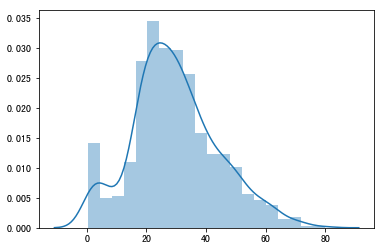

In [47]:
%matplotlib inline
import seaborn as sns
sns.distplot(y)

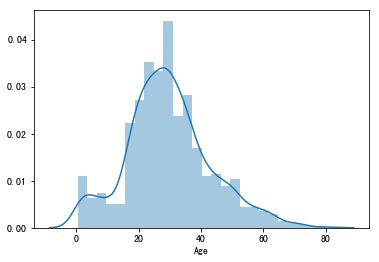

In [48]:
sns.distplot(train_data['Age'])

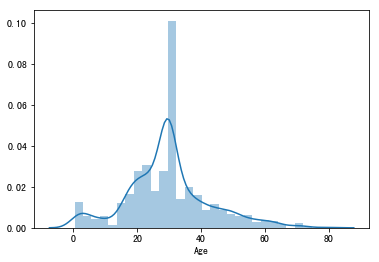

In [49]:
df_mean = df['Age'].fillna(df['Age'].mean())
sns.distplot(df_mean)

**扩展研究**

In [50]:
from sklearn.datasets import load_iris    # 引入鸢尾花数据集
import numpy as np

iris = load_iris()
X = iris.data
# 制造含有缺失值的数据集
rng = np.random.RandomState(0)
X_missing = X.copy()
mask = np.abs(X[:, 2] - rng.normal(loc=5.5, scale=0.7, size=X.shape[0])) < 0.6
X_missing[mask, 3] = np.nan    # X_missing是包含了缺失值的数据集

from missingpy import KNNImputer    # 引入KNN填充缺失值的模型
imputer = KNNImputer(n_neighbors=3, weights="uniform")
X_imputed = imputer.fit_transform(X_missing)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/missingpy/utils.py:124: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


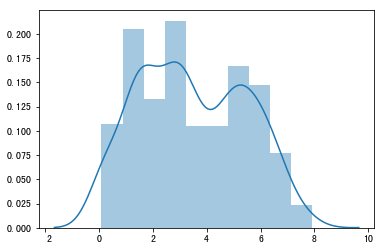

In [51]:
sns.distplot(X.reshape((-1, 1)))

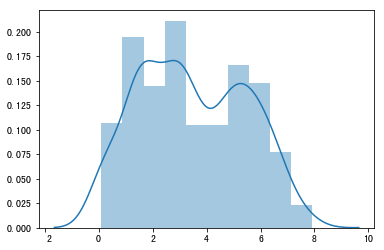

In [52]:
sns.distplot(X_imputed.reshape((-1, 1)))    # 填补缺失数据后的分布